In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
PLACEHOLDER = 0
NONZERO_PLACEHOLDER = 1
LIST_PLACEHOLDER = np.ndarray([0, 0])
NONE_PLACEHOLDER = None

# Problem 1: Gaussian Distribution

In this part, we will learn how to generate a Gaussian distribution and plot their histograms using functions in Python.

Gaussian distribution are also called normal distributions and have the well-known 'bell-shaped' curve for their probabililty density function (PDF). A Gaussian distribution is defined by its mean and its variance. According to the Central Limit Theorem (CLT), if a distribution with finite mean and finite variance is independently sampled many many times, it will approach a Gaussian distribution. For this reason, Gaussian distributions form the basis of any statistical analysis and are a good approximation to many other distributions. This result was first shown for the Binomial distribution (flipping a coin many times) by de Moivre in 1732. In the 19th century, Gauss showed that errors due to measurements are randomly distributed according to a normal distribution.

If $X$ is normally distributed with mean $\mu$ and variance $\sigma^2$, then the $Z$ distribution:
$$
Z = \frac{X - \mu}{\sigma}
$$
is normally distributed with mean 0 and variance 1. Such distributions are called standard normal distributions and are denoted by $N(0, 1)$.

The PDF of a 1-dimensional Gaussian distribution with mean $\mu$ and variance $\sigma^2$ is:

$$
f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

The PDF has the following property:

$$
\int_{-\infty}^{\infty} f(x)dx =1
$$

The cumulative distribution function (CDF) $F(x)$ of a random variable $X$ is defined by:

$$
F(X) = p(X \leq x) = \int_{-\infty}^{x}f(x)dx
$$

Hence, the PDF is calculated by first finding the CDF and taking its derivative:

$$
f(x) = F'(x)
$$

## 1.1 Sampling from the standard Gaussian distribution
Use the function `np.random.normal` to generate 5000 samples from a 1D standard normal distribution and store them in a vector $X$. 

In [2]:
n_samples = 5000
# TODO: Set loc, scale, and size parameters (scale is standard deviaiton)
X = np.random.normal(loc=PLACEHOLDER, scale=PLACEHOLDER, size=NONZERO_PLACEHOLDER)

## 1.2 Histogram of sampled data
Plot a histogram of the samples using 20 bins using `plt.hist` (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)). 

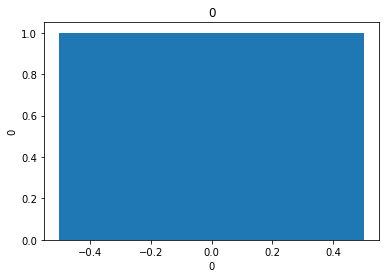

In [3]:
fig = plt.figure()
n_bins = 20
# TODO: Plot a histogram of samples using 20 bins
plt.hist(x=PLACEHOLDER, bins=NONZERO_PLACEHOLDER)
plt.xlabel(PLACEHOLDER)
plt.ylabel(PLACEHOLDER)
plt.title(PLACEHOLDER)
plt.show()

Plot another histogram of the samples, this time with bins of width 0.2 instead of 20 bins. To do this, you'll have to generate an array of bin edges, where the left-most edge is the minimum sample value, and the right-most edge is the maximum sample value.

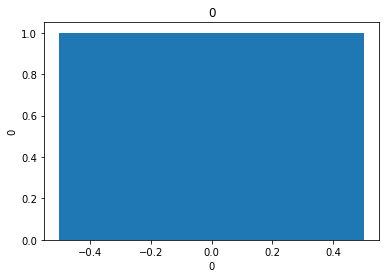

In [4]:
bin_width = 0.2
min_value = np.amin(X)
max_value = np.amin(X)
# TODO: Generate an array of bin edges using np.arange
bins = np.arange(start=PLACEHOLDER, stop=PLACEHOLDER, step=NONZERO_PLACEHOLDER)

# TODO: Plot a histogram of samples using the generated bin edges
fig = plt.figure()
plt.hist(x=PLACEHOLDER, bins=NONZERO_PLACEHOLDER)
plt.xlabel(PLACEHOLDER)
plt.ylabel(PLACEHOLDER)
plt.title(PLACEHOLDER)
plt.show()

## 1.3 Bin counts
Find the number of counts in every bin (for the histogram of bin width=0.2) created above and store them in a vector `count`. Use the method `np.histogram` (documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)) with the bins generated in the previous problem. 


In [5]:
# TODO: Create an array of bin counts
# NOTE: np.histogram returns two arrays - the first (count) is the number of counts in 
# each bin, the second (bin_edges) are the bin edges used to generate the histogram
count, bin_edges = np.histogram(a=PLACEHOLDER, bins=NONZERO_PLACEHOLDER)

## 1.4 Calculate the probability of every bin and store them in a vector $p$. Replot the normalized histogram
Use `plt.bar` (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)) to plot the normalized histogram you made in the previous problem. 

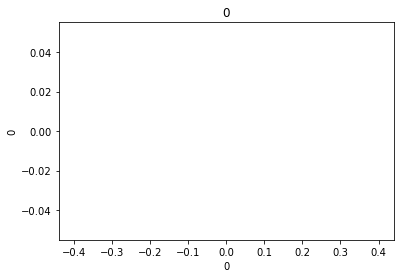

In [6]:
# TODO: Create an array of bin counts, then normalize to calculate the probability of each
# bin. 
count, bin_edges = np.histogram(a=PLACEHOLDER, bins=NONZERO_PLACEHOLDER)
count = count / NONZERO_PLACEHOLDER

fig = plt.figure()
# TODO: Plot the histogra using plt.bar
plt.bar(x=PLACEHOLDER, height=PLACEHOLDER)
plt.xlabel(PLACEHOLDER)
plt.ylabel(PLACEHOLDER)
plt.title(PLACEHOLDER)
plt.show()

## 1.5 Compare probabilities from data and from distribution 
### 1.5.a Calcuate the probability of sampling $1 \leq X < 1.5$ from the normal distribution
First, we plot the PDF of the standard normal distribution explicitly. 

0.09323043620985114


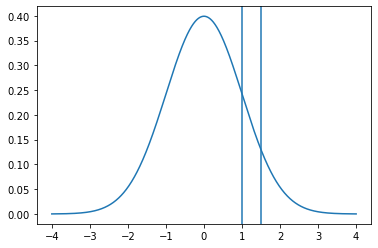

In [7]:
x = np.linspace(-4, 4, 1000)
mu = 0
sigma = 1
f = np.exp((-(x - mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
fig = plt.figure()
plt.plot(x, f)


upper = int(np.where(x > 1.5)[0][0])
lower = int(np.where(x <= 1)[0][-1])

plt.axvline(x[upper])
plt.axvline(x[lower])

print((np.sum(f[:upper]) - np.sum(f[:lower]))/np.sum(f))

plt.show()

Or, we can use the `scipy.stats` library to do this! The function `scipy.stats.norm` will generate a normal distribution, and the method `cdf` will calculate the CDF for this distribution (documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html))

In [13]:
# TODO: Find the probability of x falling in the range [1, 1.5). 
upper_prob = scipy.stats.norm(loc=PLACEHOLDER, scale=NONZERO_PLACEHOLDER).cdf(1.5) 
lower_prob = scipy.stats.norm(loc=PLACEHOLDER, scale=NONZERO_PLACEHOLDER).cdf(1.)
true_prob = upper_prob - lower_prob
print(true_prob)

0.09184805266259899


### 1.5.b Estimate this probability from  the data sampled above
Use `np.count_nonzero` to do this (see documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html)). 

*Hint*: `X > 1.0` will return an array of the same dimensions as `X` that is zero wherever array `X` is has a value greater than 1, 1 otherwise. 

In [14]:
# TODO: Find the probability of a sample falling in the range [1., 1.5)
samples_prob = np.count_nonzero(PLACEHOLDER)/NONZERO_PLACEHOLDER
print(samples_prob)

0.0


## 1.6 Normal distributions with large mean and small variance: Markov Inequality
Let $X$ be a random variable that is normally distributed with mean $\mu$ and variance $\sigma^2$. We need to establish a relation between its mean, variance, and probability. 


### 1.6.a Find $g(k) = p(X > k)$ for $\mu = 2, 3, 4,5, 6$ and $\sigma = 0.5, 1, 1.5, 2, 2.5$. Use $N = 1000$ for each sampling experiment. In all, you'll have 25 distributions

We want to do this in a vectorized way - without using a for loop. To do that, we'll use the `np.meshgrid` method (documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)). This will create a rectangular grid out of two one-dimensional arrays. Let's do this for the $\mu$ and $\sigma$ values we want to loop over:

In [89]:
n_samples = 1000
mu = np.array([2, 3, 4, 5, 6])
sigma = np.array([0.5, 1.0, 1.5, 2, 2.5])


mus, sigmas = np.meshgrid(mu, sigma)
print(mus)
print(sigmas)

# NOTE: I'm flattening the arrays to make it easier to work with, but this isn't strictly necessary.
mus = np.ndarray.flatten(mus)
sigmas = np.ndarray.flatten(sigmas)

[[2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]]
[[0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5 1.5]
 [2.  2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5 2.5]]


This gives us every possible combination of $\mu$ and $\sigma$ values. We can then create a function that will draw $N$ samples for a given $\mu$ and $\sigma$ argument, and apply this function to every square in the `mus` and `sigmas` arrays. To apply this to each element of the arrays, we'll use the map function in Python (more info [here](https://www.geeksforgeeks.org/python-map-function/)). 

In [91]:
def norm_sample(mu, sigma): 
    return np.random.normal(loc=mu,scale=sigma, size=(n_samples, ))

distributions = np.array(list(map(norm_sample, mus, sigmas)))
print(distributions.shape)

(25, 1000)


### 1.6.b Next, plot the function $g(k)/\mu/N$ versus $k$, for $k=1....10$. Can you find another function that is an upper bound for this function?

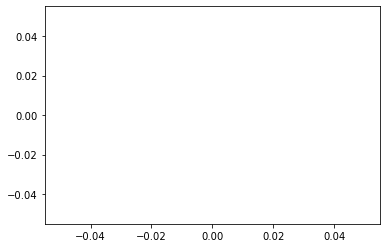

In [114]:
ks = np.linspace(1, 10, 20) 
fig = plt.figure()

# TODO: Define a lambda function g that will find g(k)/mu for each k. Then use the map function to apply this to each
# element in ks
for distribution, mu in zip(distributions, mus):    
    g_func = lambda PLACEHOLDER: PLACEHOLDER
    g = np.array(list(map(PLACEHOLDER, LIST_PLACEHOLDER)))
    plt.plot(PLACEHOLDER)
    
    # ANSWER
    g_func = lambda k: sum(distribution > k)/mu/n_samples
    g = np.array(list(map(g_func, ks)))

# TODO: Plot a function that is an upper bound for this function
# HINT: Try different exponential functions over k e.g. np.exp(0.5*ks)
plt.plot(PLACEHOLDER)

plt.show()

### 1.6.c Repeat the same calculation for binomial distribution

Use the function `np.random.binomial` (documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)). The probability density function of the binomial distribution is

$$
f(x| N, p) = {N \choose p}p^x(1 - p)^{N - x}
$$

where $x = 0, 1, 2, 3...N$. 

$x$ is the number of successes in $N$ trials. $p$ is the probability of success. 

You can think of $f(x|N, p)$ as the probability of getting $x$ heads when you flip a coin $N$ times, where the probability of heads with this coin is $p$. 

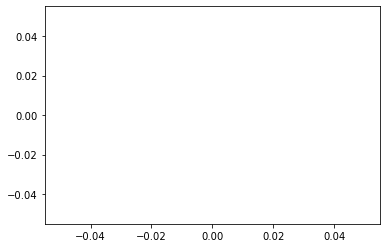

In [115]:
p = 0.2
ns = np.arange(6, 10)

fig = plt.figure()


for n in ns:    
    # TODO: Sample n_samples from binomial distribution with n, p. 
    distribution = np.random.binomial(n=PLACEHOLDER, p=PLACEHOLDER, size=(PLACEHOLDER, ))
    # TODO: Define a lambda function g that will find g(k) for each k.
    # Then use the map function to apply this to each element in ks
    g_func = lambda PLACEHOLDER: PLACEHOLDER
    g = np.array(list(map(PLACEHOLDER, LIST_PLACEHOLDER)))
    plt.plot(PLACEHOLDER)
     

# TODO: Plot a function that is an upper bound for this function
# HINT: Try different exponential functions over k e.g. np.exp(0.5*ks)
plt.plot(PLACEHOLDER)

plt.show()

**CONCLUSION** This result applies to more general distributions. For **any** distribution $X$ that is nonnegative, the probability that $X$ is larger than $2\mu$ is at most 1/2. This probability is called the **Markov inequality**. The result is independent of variance. 

## 1.7 Law of large numbers
Consider a standard normal distribution. Find the mean of finitely many samples and plot the mean against the number of samples. Take $N = 1:10:10000$

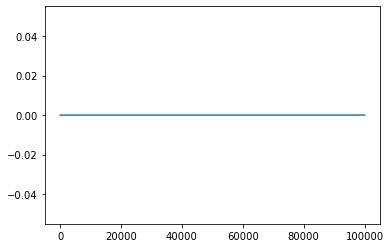

In [117]:
N = np.arange(start=1, stop=100001, step=10)
mean = np.zeros((len(N)))

for i in range(len(N)):
    n = N[i]
    # TODO: Sample n samples from standard normal using
    X = PLACEHOLDER
    # TODO: Find the mean 
    mean[i] = np.mean(PLACEHOLDER)
    
fig = plt.figure()
plt.plot(N, mean)
plt.show()

**CONCLUSION** As the sample size grows, its mean approaches that of the distribution

## 1.8 Limit of a binomial distribution

Use the function `np.random.binomial` (documentation [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)). The probability density function of the binomial distribution is

$$
f(x| N, p) = {N \choose p}p^x(1 - p)^{N - x}
$$

where $x = 0, 1, 2, 3...N$. 

$x$ is the number of successes in $N$ trials. $p$ is the probability of success. 

You can think of $f(x|N, p)$ as the probability of getting $x$ heads when you flip a coin $N$ times, where the probability of heads with this coin is $p$. 

The mean for this distribution is $Np$. The variance is $Np(1 - p)$. 

We would like to compare this discrete distribution to the normal distribution (with the same mean and variance) for various $N$ by plotting the corresponding histograms.

Choose $p = 0.75$, and plot for $N = 2$ and $N = 30$. Use `scipy.stats.binom.pmf` (documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html))

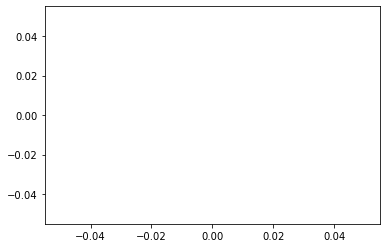

In [141]:
p = 0.75

N = 2
x = np.arange(N+1)
# TODO: Generate probability mass function (PMF, equivalent of PDF for a discrete distribution) for 
# binomial
y = scipy.stats.binom(n=PLACEHOLDER, p=PLACEHOLDER).pmf(PLACEHOLDER)

# NOTE: Do the same for a normal distribution with the same mean and variance
y_normal = scipy.stats.norm(loc=N*p, scale=np.sqrt(N*p*(1-p))).pdf(x)

# TODO: Plot y and y_normal

fig = plt.figure()
plt.plot(PLACEHOLDER, PLACEHOLDER)
plt.plot(PLACEHOLDER, PLACEHOLDER)
plt.show()

# TODO: Repeat the above calculations for N = 30

## 1.9 Is the sum of two Gaussians a Gaussian?
Generate two data sets $X_1$ and $X_2$ from 2 normal distributions $N(0.5, 1)$ and $N(1, 2)$, respectively, each of size n_samples = 5000. Generate $X_{12}$, a normal distribution $N(0.5 + 1, 1 + 2)$. Plot this against $X_1 + X_2$ .

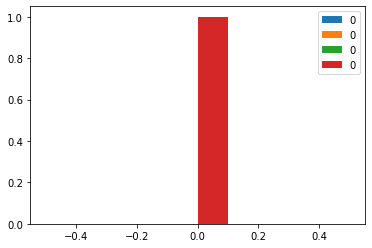

In [143]:
n_samples = 5000
mu_1 = 0.5
mu_2 = 1

sigma_1 = 1
sigma_2 = 2

# TODO: Generate the two datasets
x_1 = np.random.normal(loc=PLACEHOLDER, scale=PLACEHOLDER, size=(PLACEHOLDER, ))
x_2 = np.random.normal(loc=PLACEHOLDER, scale=PLACEHOLDER, size=(PLACEHOLDER, ))

# TODO: Generate dataset for X_12
x_12 = np.random.normal(loc=PLACEHOLDER, scale=PLACEHOLDER, size=(PLACEHOLDER, ))

# TODO: Generate dataset for X_1 + X_2
x_1_2 = PLACEHOLDER

# TODO: Plot histograms for X_1, X_2, X_12, and X_1 + X_2
fig = plt.figure()
plt.hist(PLACEHOLDER, label=PLACEHOLDER)
plt.hist(PLACEHOLDER, label=PLACEHOLDER)
plt.hist(PLACEHOLDER, label=PLACEHOLDER)
plt.hist(PLACEHOLDER, label=PLACEHOLDER)
plt.legend()
plt.show()

Now, lets fit $X_1 + X_2$ to a normal distribution. 

In [146]:
fit_mu, fit_sigma = scipy.stats.norm.fit(PLACEHOLDER)
print(fit_mu, fit_sigma)

0.0 0.0


**Theorem** Let $X$ and $Y$ be 2 independent normally distributed random variables with mean $\mu_X$, $\mu_Y$, and variance $\sigma^2_X$, $\sigma^2_Y$, respectively. Then, $X+Y$ is normally distrbuted with mean $\mu_x + \mu_y$ and variance $\sigma^2_X + \sigma^2_Y$. To prove this, we calculate the CDF of the sum, and take its derivative

$$
p(X + Y \leq z) = \int_{-\infty}^{\infty} dx \int_{-\infty}^{z-X}f(X)g(Y)dy
$$
where $f(x) and $g(y)$ are the PDFs of $X$ and $Y$, respectively. 

Therefore, the PDF of the sum is a convolution of the respective PDFs. 

For Gaussian distributions:

$$
h(x) = \frac{1}{\sqrt{2\pi \sigma_X^2}}\frac{1}{\sqrt{2\pi \sigma_Y^2}}e^{\frac{-(y-\mu_Y)^2}{2\sigma_Y^2}}e^{\frac{-(x-\mu_X)^2}{2\sigma_X^2}} = \frac{1}{\sqrt{2\pi (\sigma_X^2 +  \sigma_Y^2)}}e^{\frac{-((y + x)-\mu_Y-\mu_X)^2}{2(\sigma_X^2 + \sigma_Y^2)}}
$$

## SKIPPED 1.10

# Problem 2: Vectors and matrices
## 2.1 Create two 2D vectors with x-values and y-values, each sampled from a standard univariate Gaussian distribution

In [151]:
np.random.seed(1)
# TODO: Use np.random.normal, with size set to (2, 1)
v1 = PLACEHOLDER
v2 = PLACEHOLDER

# ANSWER
v1 = np.random.normal(size=(2,1))

## 2.2 Plot the above two vectors in 2D with a line segment emanating from the origin

[[ 0.          1.62434536]
 [ 0.         -0.61175641]]
[]


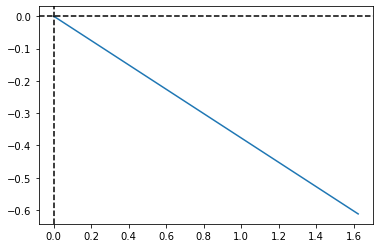

In [181]:
fig = plt.figure()

# NOTE: Generating an array for the origin. 
origin = np.array([0, 0])[:, np.newaxis]
# NOTE: Stacking these arrays to create a matrix where each column is an endpoint of the line we want to plot
data1 = np.hstack((origin, v1))
print(data1)
plt.plot(data1[0, :], data1[1, :])

# TODO: Do the same as above for the second line
data2 = np.hstack((LIST_PLACEHOLDER, LIST_PLACEHOLDER))
print(data2)
plt.plot(PLACEHOLDER, PLACEHOLDER)

# TODO: Generate lines that go through origin
plt.axvline(x=PLACEHOLDER, linestyle='--', color='black')
plt.axhline(y=PLACEHOLDER, linestyle='--', color='black')

plt.show()

## 2.3 Compute the length of each vector

In [183]:
# TODO: Calculate length of v1 and v2 (without using np.linalg.norm). Compare these results to np.linalg.norm
length_v1 = PLACEHOLDER
length_v2 = PLACEHOLDER
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

1.7357257185673867
0.0


## 2.4 Find the angle between two vectors

In [ ]:
# TODO: Find the angle in degrees using the dot product. Do not use np.dot (though you can use this to check)
# your answer
angle_v1_v2 = PLACEHOLDER


## 2.5 Project V1 onto V2
Plot the projection along with the two vectors. Do not use any numpy functions to find the projection

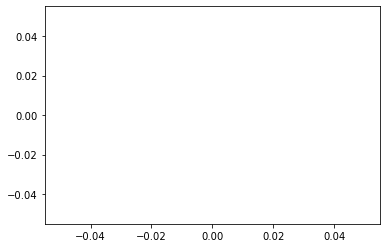

In [186]:
v1proj = PLACEHOLDER

# TODO: Plot the projected line
fig = plt.figure()
origin = np.array([0, 0])[:, np.newaxis]
datav1proj = np.hstack((origin, PLACEHOLDER))
plt.plot(PLACEHOLDER, PLACEHOLDER)



# TODO: Plot v1 and v2 (you can copy code from 2.2)
# TODO: Generate lines that go through origin (you can copy code from 2.2)
PLACEHOLDER

plt.show()



## 2.6 Rotate V1 and V2 by 45 degree _clockwise_ rotation
Use a rotation matrix. Plot the resulting vectors in the same plot

In [187]:
# TODO: Write the rotation matrix
rot = np.array([[PLACEHOLDER, PLACEHOLDER], [PLACEHOLDER, PLACEHOLDER]])


# TODO: Calculate rotated vectors
rot_v1 = PLACEHOLDER
rot_v2 = PLACEHOLDER

# TODO: Plot rotated vectors in the same graph
fig = plt.figure()
origin = np.array([0, 0])[:, np.newaxis]

data_rot_v1 = np.hstack((origin, PLACEHOLDER))
data_rot_v2 = np.hstack((origin, PLACEHOLDER))
plt.plot(PLACEHOLDER, PLACEHOLDER)
plt.plot(PLACEHOLDER, PLACEHOLDER)
 
# TODO: Plot v1 and v2 (you can copy code from 2.2)
# TODO: Generate lines that go through origin (you can copy code from 2.2)
PLACEHOLDER

plt.show()


## 2.7 Dot project of rotated vectors
### 2.7.a Find the norm of the rotated vectors and compare to that of the original vectors. 
You can use `np.linalg.norm`

In [193]:
# TODO: Find norm of rotated vectors
len_rot_v1 = PLACEHOLDER
len_rot_v2 = PLACEHOLDER

# TODO: Compare to norm of original vectors
print(len_rot_v1, PLACEHOLDER)
print(len_rot_v2, PLACEHOLDER)

0 0
0 0


### 2.7.b Find the dot product of the rotated vectors and compare it to that of the original vectors

In [194]:
# TODO: Find the dot product of rot_v1 and rot_v2
rot_dot = PLACEHOLDER

# TODO: Compare dot product before and after rotation
PLACEHOLDER

0

## 2.8 Transpose of a rotation matrix
Find the transpose of `rot` and find the product of `rot` with its transpose. What do you conclude?

In [197]:
# TODO: Find transpose of rot
rot_T = PLACEHOLDER
# TODO: Find product of rot with its transpose
PLACEHOLDER

0

## 2.9 Try to use results from 2.7 to derive 2.8
Write out this proof in Latex!